# About Dataset
## Overview

This dataset contains historical daily prices for indices currently trading on the Indian Stock Market. The historical data are retrieved from the NSE India website. Daily gold price from 1979 to 2022 in INR is uploaded here.

    Premier
        PE, P/B, Div Yield Data.
        Gold price to INR Data. 

## Content

This data contains daily OHLC data for all indices in NSE from 1990 to 2022. Along with Indices OHLC data, there are PE(Price to Earning ratio), P/B (Price to book value), and Dividend Yield data also available for all indices.
Lastly, Volatility Index (VIX) data is also available from 1990 to 2022.

For Example -

    "Nifty 50 data" contains the below columns:
        Date - Date of observation
        Open - Open price of the index on a particular day
        High - High price of the index on a particular day
        a particular day
        Low - Low price of the index on a particular day
        Close - Close price of the index on a particular day
        a particular day

    "NIFTY 50 - HistoricalPEPBDIVData" contains the below columns:
        Date - Date of observation
        P/E - Price to Earnings Ratio
        P/B - Price-to-book value
        Div Yield % - Dividend Yield = Cash Dividend per share / Market Price per share * 100

    "Gold price INR.csv" contains Date and Gold price (INR per troy ounce).
    Where 1 Troy ounce = 31.1035 gram

The list of indices is:

    NIFTY 50
    NIFTY 100
    NIFTY BANK
    NIFTY COMMODITIES
    NIFTY ENERGY
    NIFTY FMCG
    NIFTY HOUSING
    NIFTY INDIA MANUFACTURING
    NIFTY INFRASTRUCTURE
    NIFTY IT
    NIFTY MEDIA
    NIFTY METAL
    NIFTY MIDCAP 100
    NIFTY NEXT 50
    NIFTY OIL & GAS
    NIFTY PHARMA
    NIFTY PRIVATE BANK
    NIFTY PSU BANK
    NIFTY AUTO
    VIX History

## Inspiration

    Data is uploaded for Research and Educational purposes.
    The data scientists and researchers can download any index OHLC data, along with P/B, PE, and Dividend Yield values and VIX data.
    Even Gold prices can help researchers to get more insight into their investment decisions.
    A time series forecasting for future index price, based on multiple features along with OHLC data and P/B, P/E, and Div Yield percentage, VIX.

## Data Source

For the gold price - https://gold.org
For stock indices - https://www.niftyindices.com/reports/historical-data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-index-data-india-1990-2022/NIFTY PSU BANK_Data.csv
/kaggle/input/stock-market-index-data-india-1990-2022/NIFTY IT - HistoricalPE_PBDIV_Data.csv
/kaggle/input/stock-market-index-data-india-1990-2022/NIFTY INDIA MANUFACTURING - HistoricalPE_PBDIV_Data.csv
/kaggle/input/stock-market-index-data-india-1990-2022/NIFTY HOUSING_Data.csv
/kaggle/input/stock-market-index-data-india-1990-2022/NIFTY INFRASTRUCTURE_Data.csv
/kaggle/input/stock-market-index-data-india-1990-2022/NIFTY PHARMA - HistoricalPE_PBDIV_Data.csv
/kaggle/input/stock-market-index-data-india-1990-2022/NIFTY NEXT 50 - HistoricalPE_PBDIV_Data.csv
/kaggle/input/stock-market-index-data-india-1990-2022/NIFTY MEDIA_Data.csv
/kaggle/input/stock-market-index-data-india-1990-2022/Data description.txt
/kaggle/input/stock-market-index-data-india-1990-2022/NIFTY HOUSING - HistoricalPE_PBDIV_Data.csv
/kaggle/input/stock-market-index-data-india-1990-2022/NIFTY COMMODITIES - HistoricalPE_PBDIV_Data.csv
/kaggle/input

In [2]:
import matplotlib.pyplot as plt
# plt.style.use("fivethirtyeight")
# plt.rcParams()
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
from scipy import stats
from pandas.plotting import table

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import os
py.offline.init_notebook_mode(connected=True)

# Exploratory Data Analysis on Nifty50 Market Index from 1990-2022

In [3]:
df_nifty50 = pd.read_csv("../input/stock-market-index-data-india-1990-2022/NIFTY 50_Data.csv")
df_nifty50.head()

,Date,Open,High,Low,Close
0,12 Aug 2022,17659.65,17724.65,17597.85,17698.15
1,11 Aug 2022,17711.65,17719.30,17631.95,17659.00
2,10 Aug 2022,17566.10,17566.10,17442.80,17534.75
3,08 Aug 2022,17401.50,17548.80,17359.75,17525.10
4,05 Aug 2022,17423.65,17474.40,17348.75,17397.50


In [4]:
df_nifty50.shape

(7789, 5)

In [5]:
df_nifty50.tail()

,Date,Open,High,Low,Close
7784,10 Jul 1990,NaN,NaN,NaN,288.69
7785,09 Jul 1990,NaN,NaN,NaN,289.69
7786,06 Jul 1990,NaN,NaN,NaN,289.04
7787,05 Jul 1990,NaN,NaN,NaN,284.04
7788,03 Jul 1990,NaN,NaN,NaN,279.02


In [6]:
df_nifty50.describe(include='all')

,Date,Open,High,Low,Close
count,7789,6664.000000,6664.000000,6664.000000,7789.000000
unique,7789,NaN,NaN,NaN,NaN
top,12 Aug 2022,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,5392.953223,5428.116730,5350.187050,4731.030813
std,NaN,4398.416207,4415.879873,4370.905307,4371.076578
min,NaN,786.370000,805.820000,775.430000,279.020000
25%,NaN,1326.562500,1346.187500,1310.750000,1090.900000
50%,NaN,4768.550000,4830.025000,4727.775000,3260.100000
75%,NaN,8229.525000,8263.112500,8165.650000,7614.300000


In [7]:
df_nifty50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7789 non-null   object 
 1   Open    6664 non-null   float64
 2   High    6664 non-null   float64
 3   Low     6664 non-null   float64
 4   Close   7789 non-null   float64
dtypes: float64(4), object(1)
memory usage: 304.4+ KB


In [8]:
df_nifty50['Date'] = pd.to_datetime(df_nifty50['Date'])

In [9]:
df_nifty50.isnull().sum()

Date        0
Open     1125
High     1125
Low      1125
Close       0
dtype: int64

In [10]:
# df_nifty50["Open"].fillna(0)
# df_nifty50["High"].fillna(0)
# df_nifty50["Low"].fillna(0)

df_nifty50.fillna(0, inplace=True)

In [11]:
df_nifty50.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

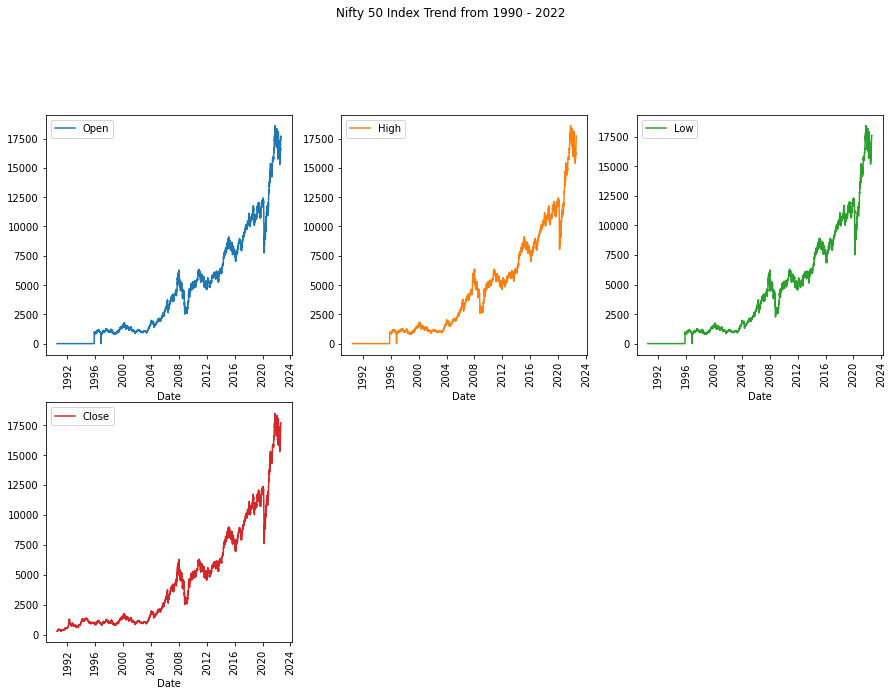

In [12]:
# df_nifty50.set_index("Date", inplace=True)
column_list = ['Open', 'High', 'Low', 'Close']

df_nifty50.plot(x="Date", y=column_list, subplots=True, layout=(3,3), figsize=(15,15), sharex=False, title='Nifty 50 Index Trend from 1990 - 2022', rot=90)

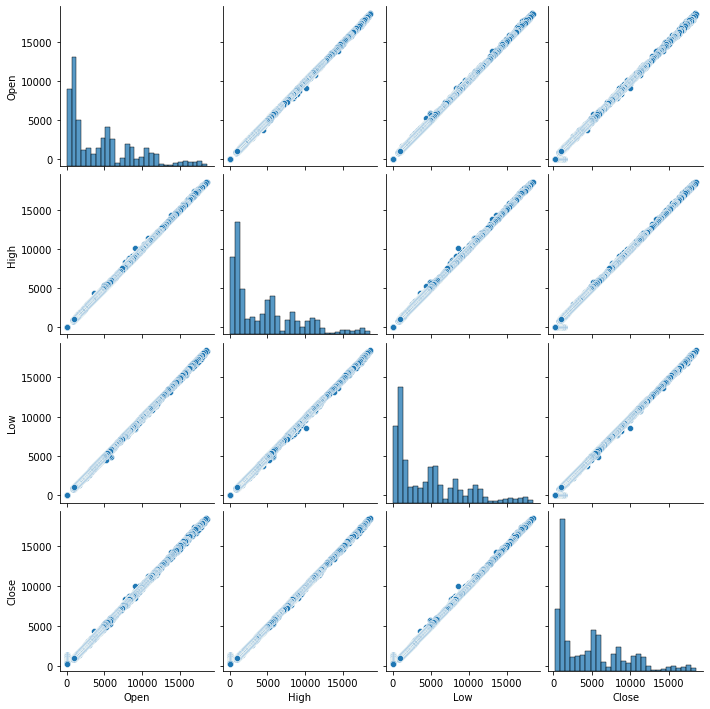

In [13]:
sns.pairplot(df_nifty50)

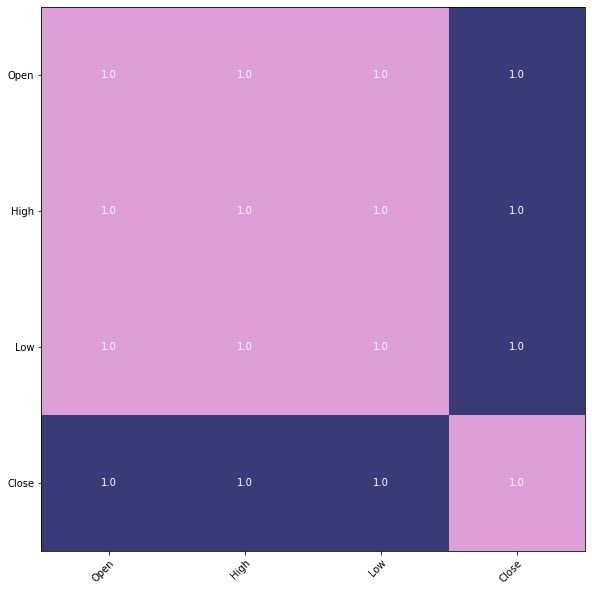

In [14]:
#get correlation matrix
corr = df_nifty50.corr()
fig, ax = plt.subplots(figsize = (10, 10))

#create a heatmap
# plt.figure(figsize=(20,20))
im = ax.imshow(corr.values,cmap="tab20b")

#set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

#Rotating xticklabels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j,i,np.around(corr.iloc[i,j],decimals=2), ha="center", va="center", color="white")
        
# sns.heatmap(df_nifty50.corr())

In [15]:
#Correlation Matrix
corr

,Open,High,Low,Close
Open,1.000000,0.999957,0.999938,0.997732
High,0.999957,1.000000,0.999918,0.997725
Low,0.999938,0.999918,1.000000,0.997821
Close,0.997732,0.997725,0.997821,1.000000


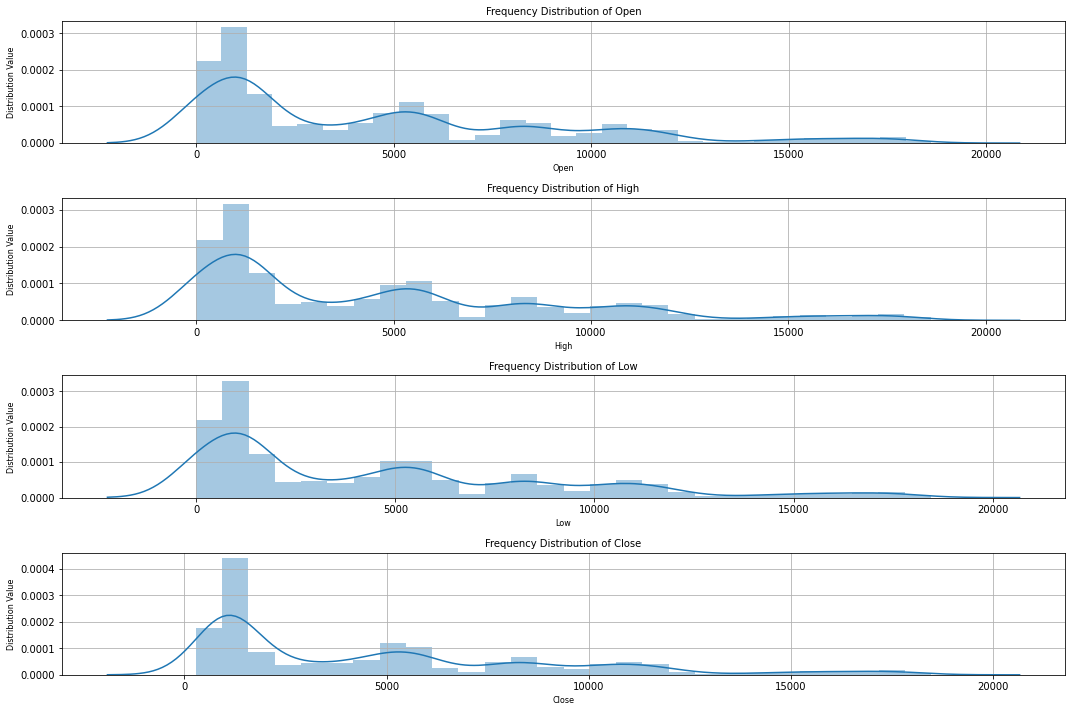

In [16]:
# Visualize the spread and skweness through the distribution plot

# Use the Column_List : list initialized above in the following steps
fig, ax = plt.subplots(len(column_list), figsize = (15, 10))

for i, col_list in enumerate(column_list):
    sns.distplot(df_nifty50[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make markings

## Outlier Detection and Removal

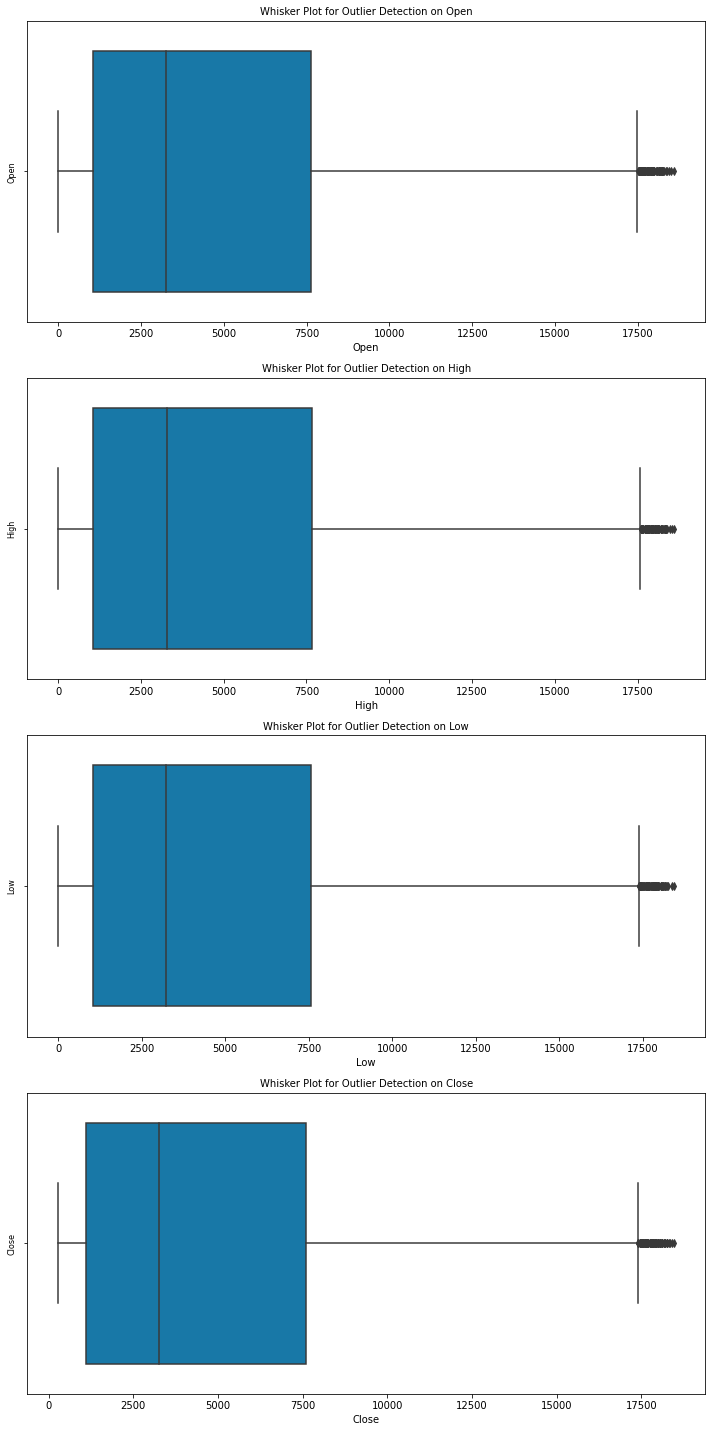

In [17]:
# Generate whisker plots to detect the presence of any outliers
fig, ax = plt.subplots (len(column_list), figsize = (10, 20))

for i, col_list in enumerate(column_list):
    sns.boxplot(df_nifty50[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

In [18]:
# It is evident from the whisker plots that there are some outliers in all the variables

# Remove the variables either using IQR technique or Z-Score
Descriptive_Statistics = df_nifty50.describe()
Descriptive_Statistics = Descriptive_Statistics.T # Transpose the data

# Extract the IQR values 
Descriptive_Statistics['IQR'] = Descriptive_Statistics['75%'] - Descriptive_Statistics['25%']

# In this scenario, the outliers are removed using Z-Score due to the variability in historical data
df_nifty50 = df_nifty50[(np.abs(stats.zscore(df_nifty50[['Open', 'High', 'Low', 'Close']])) < 3).all(axis = 1)] # abs for (+/-) 3-sigma
Data = df_nifty50.reset_index() # Due to elimination of rows, index has to be reset

# Now compare the new dimension with the old one (The one mentioned during the reading of the file)
Data # 7751 * 6

,index,Date,Open,High,Low,Close
0,0,2022-08-12,17659.65,17724.65,17597.85,17698.15
1,1,2022-08-11,17711.65,17719.30,17631.95,17659.00
2,2,2022-08-10,17566.10,17566.10,17442.80,17534.75
3,3,2022-08-08,17401.50,17548.80,17359.75,17525.10
4,4,2022-08-05,17423.65,17474.40,17348.75,17397.50
...,...,...,...,...,...,...
7746,7784,1990-07-10,0.00,0.00,0.00,288.69
7747,7785,1990-07-09,0.00,0.00,0.00,289.69
7748,7786,1990-07-06,0.00,0.00,0.00,289.04
7749,7787,1990-07-05,0.00,0.00,0.00,284.04


In [19]:
Data.shape

(7751, 6)

## Extensive Analysis on Historical Data to Find Patterns

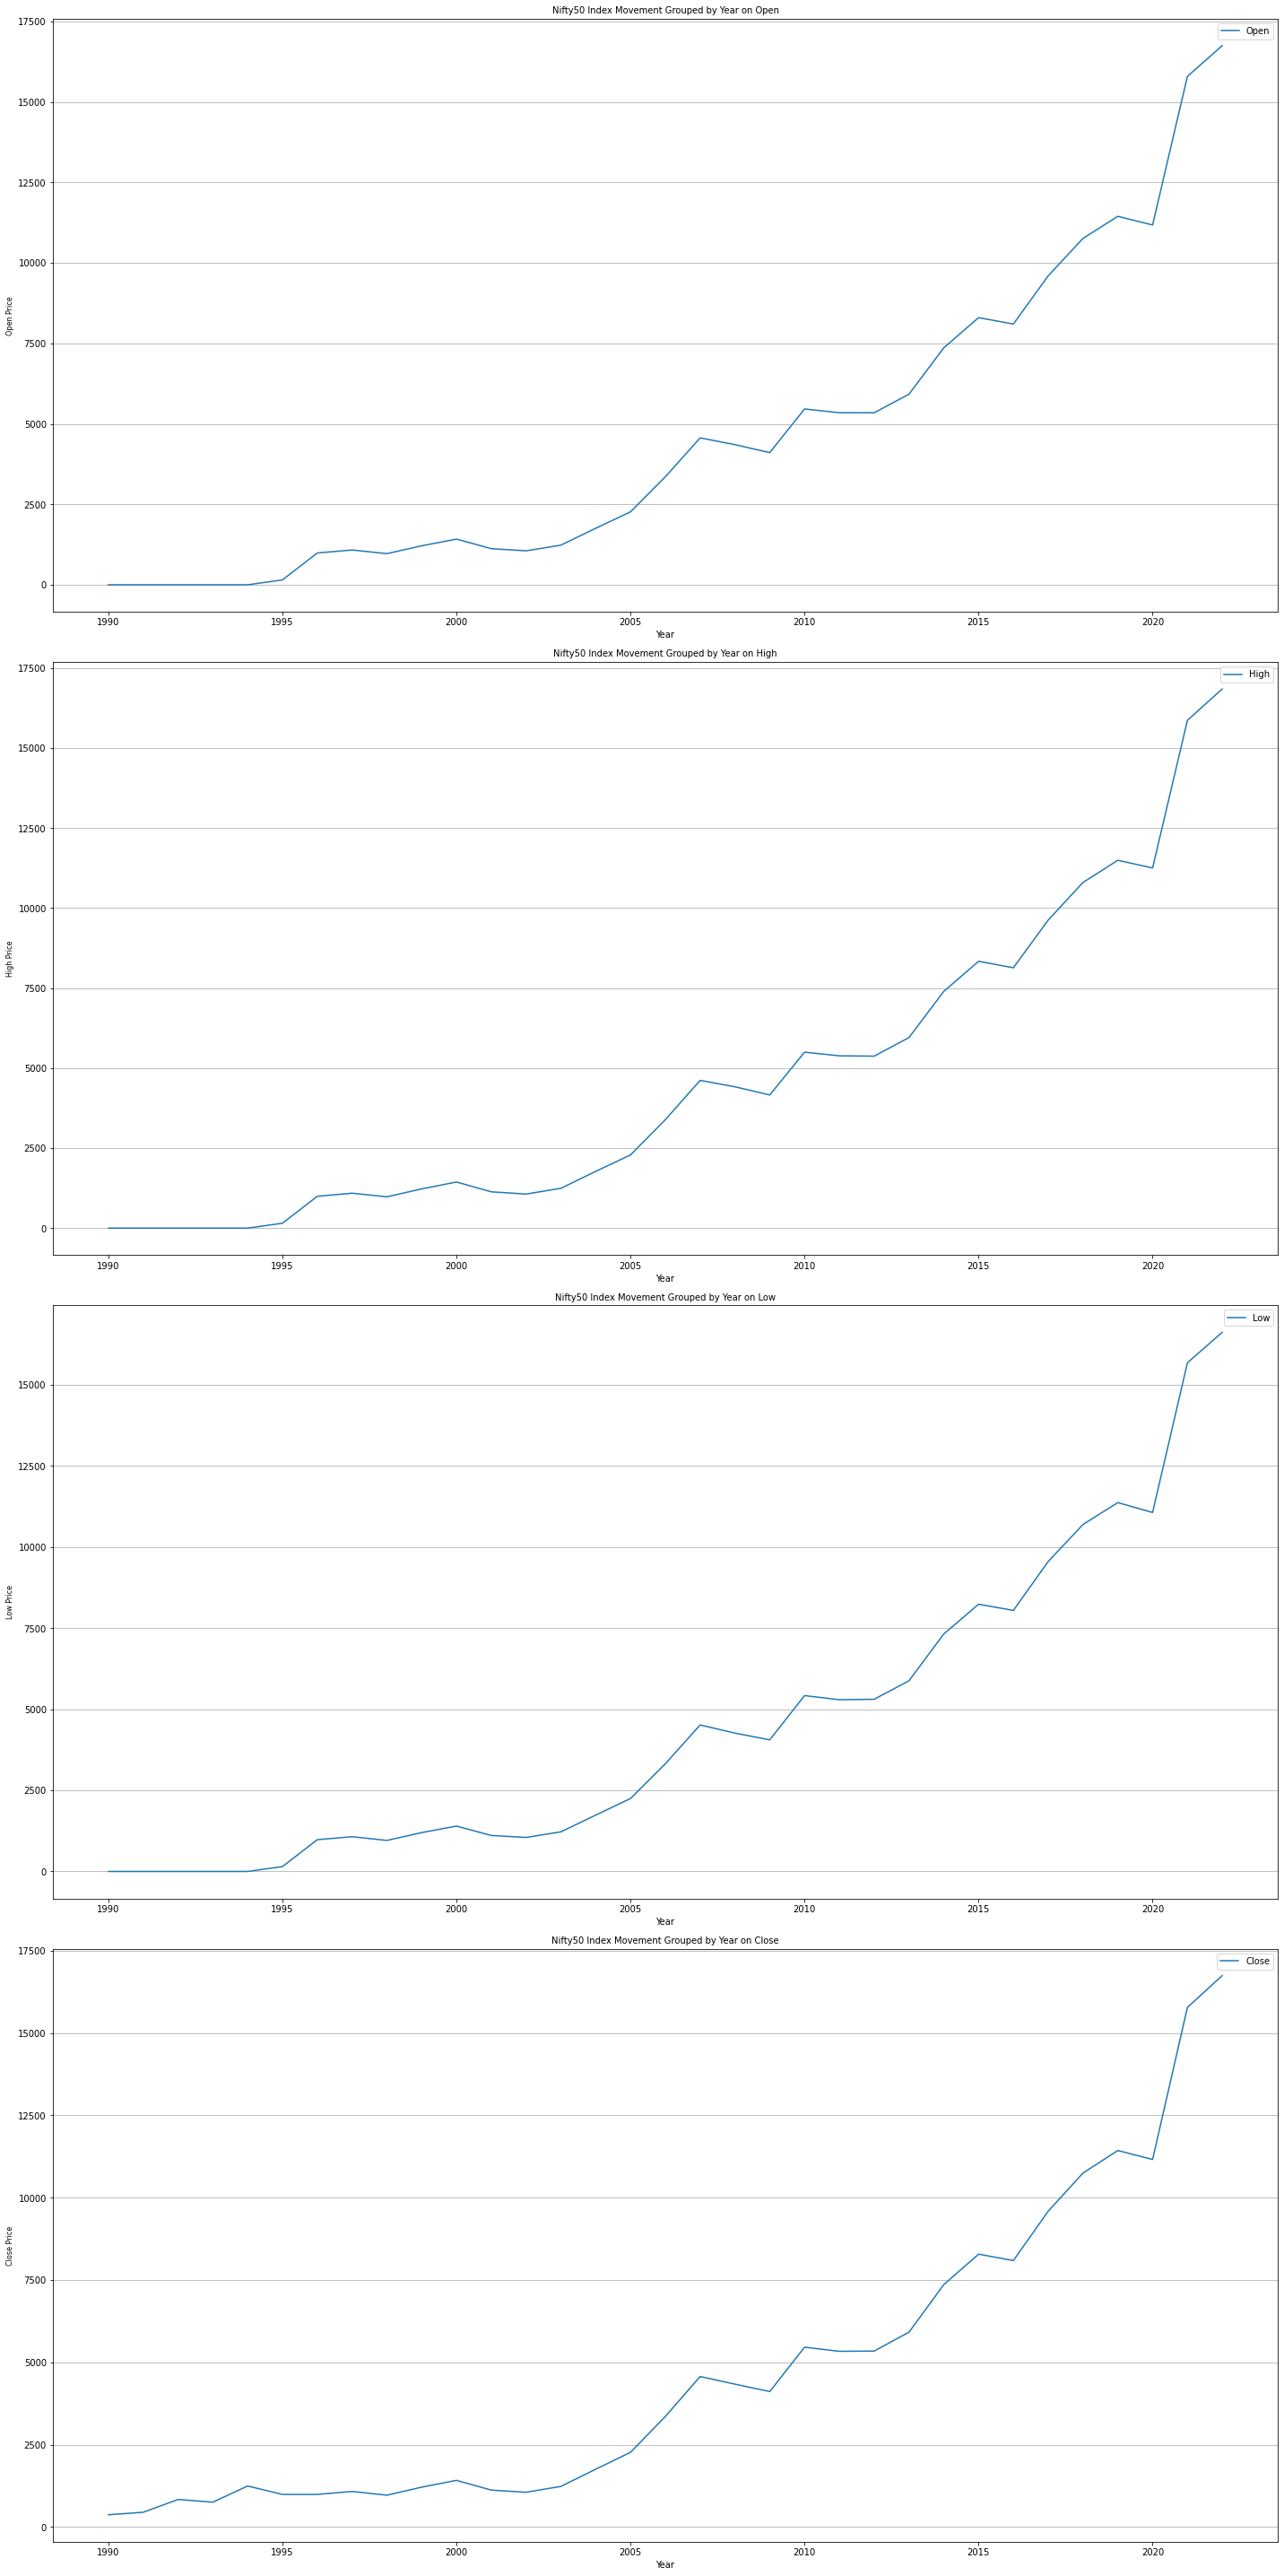

In [20]:
# Since the data is a time series data, we should be able to predict the future through forecasting techniques

# Delete the index column due to reset
# del Data['index']

# Decompose the time series year-wise and month-wise to analyse further
Data['Year'] = Data['Date'].dt.year
Data['Month'] = Data['Date'].dt.month
Data['WeekDay'] = Data['Date'].dt.weekday
Data.sort_values(by=['Date'], ascending=True, inplace=True)

# Firstly, plot the data year-wise to see the duration of when it hiked and dipped
fig, ax = plt.subplots(len(column_list), figsize = (20, 40))

# Group the data by year and plot
for i, col_list in enumerate(column_list):
    Data.groupby('Year')[col_list].mean().plot(ax = ax[i], legend = True)
    ax[i].set_title("Nifty50 Index Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) # To enable grid only on the Y-axis

In [21]:
df_N50H = pd.read_csv('../input/stock-market-index-data-india-1990-2022/NIFTY 50 - HistoricalPE_PBDIV_Data.csv')
df_N50H.head()

,Date,P/E,P/B,Div Yield %
0,12 Aug 2022,21.18,4.15,1.35
1,11 Aug 2022,21.29,4.18,1.36
2,10 Aug 2022,21.11,4.21,1.34
3,08 Aug 2022,21.02,4.21,1.33
4,05 Aug 2022,20.86,4.18,1.29


In [22]:
df_N50H.tail()

,Date,P/E,P/B,Div Yield %
5872,07 Jan 1999,12.46,2.22,1.71
5873,06 Jan 1999,12.11,2.16,1.75
5874,05 Jan 1999,11.84,2.11,1.79
5875,04 Jan 1999,11.72,2.08,1.81
5876,01 Jan 1999,11.62,2.07,1.83


In [23]:
df_N50H.shape

(5877, 4)

In [24]:
df_N50H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5877 non-null   object 
 1   P/E          5877 non-null   float64
 2   P/B          5877 non-null   float64
 3   Div Yield %  5877 non-null   object 
dtypes: float64(2), object(2)
memory usage: 183.8+ KB


In [25]:
# changing Date to Datetimeobject
df_N50H['Date'] = pd.to_datetime(df_N50H['Date'])

In [26]:
df_N50H.isnull().sum()

Date           0
P/E            0
P/B            0
Div Yield %    0
dtype: int64

In [27]:
Data.head()

,index,Date,Open,High,Low,Close,Year,Month,WeekDay
7750,7788,1990-07-03,0.0,0.0,0.0,279.02,1990,7,1
7749,7787,1990-07-05,0.0,0.0,0.0,284.04,1990,7,3
7748,7786,1990-07-06,0.0,0.0,0.0,289.04,1990,7,4
7747,7785,1990-07-09,0.0,0.0,0.0,289.69,1990,7,0
7746,7784,1990-07-10,0.0,0.0,0.0,288.69,1990,7,1


In [28]:
Data.tail()

,index,Date,Open,High,Low,Close,Year,Month,WeekDay
4,4,2022-08-05,17423.65,17474.40,17348.75,17397.50,2022,8,4
3,3,2022-08-08,17401.50,17548.80,17359.75,17525.10,2022,8,0
2,2,2022-08-10,17566.10,17566.10,17442.80,17534.75,2022,8,2
1,1,2022-08-11,17711.65,17719.30,17631.95,17659.00,2022,8,3
0,0,2022-08-12,17659.65,17724.65,17597.85,17698.15,2022,8,4


In [29]:
#Merging Data to find more insights based on Close, P/E, P/B, Div Yield%
Data2 = pd.merge(Data, df_N50H, how='outer', on='Date')
Data2.head()

,index,Date,Open,High,Low,Close,Year,Month,WeekDay,P/E,P/B,Div Yield %
0,7788.0,1990-07-03,0.0,0.0,0.0,279.02,1990.0,7.0,1.0,NaN,NaN,NaN
1,7787.0,1990-07-05,0.0,0.0,0.0,284.04,1990.0,7.0,3.0,NaN,NaN,NaN
2,7786.0,1990-07-06,0.0,0.0,0.0,289.04,1990.0,7.0,4.0,NaN,NaN,NaN
3,7785.0,1990-07-09,0.0,0.0,0.0,289.69,1990.0,7.0,0.0,NaN,NaN,NaN
4,7784.0,1990-07-10,0.0,0.0,0.0,288.69,1990.0,7.0,1.0,NaN,NaN,NaN


In [30]:
Data2.shape

(7789, 12)

In [31]:
#sorting data as per date
Data2 = Data2.sort_values(by='Date',ascending=False)
Data2.tail()

,index,Date,Open,High,Low,Close,Year,Month,WeekDay,P/E,P/B,Div Yield %
4,7784.0,1990-07-10,0.0,0.0,0.0,288.69,1990.0,7.0,1.0,NaN,NaN,NaN
3,7785.0,1990-07-09,0.0,0.0,0.0,289.69,1990.0,7.0,0.0,NaN,NaN,NaN
2,7786.0,1990-07-06,0.0,0.0,0.0,289.04,1990.0,7.0,4.0,NaN,NaN,NaN
1,7787.0,1990-07-05,0.0,0.0,0.0,284.04,1990.0,7.0,3.0,NaN,NaN,NaN
0,7788.0,1990-07-03,0.0,0.0,0.0,279.02,1990.0,7.0,1.0,NaN,NaN,NaN


In [32]:
Data2.describe(include="all")

,index,Date,Open,High,Low,Close,Year,Month,WeekDay,P/E,P/B,Div Yield %
count,7751.000000,7789,7751.000000,7751.000000,7751.000000,7751.000000,7751.000000,7751.000000,7751.000000,5877.000000,5877.000000,5877
unique,NaN,7789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246
top,NaN,2022-08-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.25
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163
first,NaN,1990-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-08-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3912.207457,NaN,4547.912744,4577.818487,4511.717256,4665.605767,2006.331570,6.486776,2.014837,20.746117,3.572588,NaN
std,2239.014641,NaN,4398.692430,4418.515241,4369.748640,4280.463747,9.063659,3.425491,1.426174,5.056217,0.785172,NaN
min,0.000000,NaN,0.000000,0.000000,0.000000,279.020000,1990.000000,1.000000,0.000000,10.680000,1.920000,NaN
25%,1975.500000,NaN,1052.925000,1061.300000,1043.300000,1089.300000,1999.000000,4.000000,1.000000,17.410000,3.050000,NaN


In [33]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7789 entries, 7750 to 0
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        7751 non-null   float64       
 1   Date         7789 non-null   datetime64[ns]
 2   Open         7751 non-null   float64       
 3   High         7751 non-null   float64       
 4   Low          7751 non-null   float64       
 5   Close        7751 non-null   float64       
 6   Year         7751 non-null   float64       
 7   Month        7751 non-null   float64       
 8   WeekDay      7751 non-null   float64       
 9   P/E          5877 non-null   float64       
 10  P/B          5877 non-null   float64       
 11  Div Yield %  5877 non-null   object        
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 791.1+ KB


In [34]:
Data2.isnull().sum()

index            38
Date              0
Open             38
High             38
Low              38
Close            38
Year             38
Month            38
WeekDay          38
P/E            1912
P/B            1912
Div Yield %    1912
dtype: int64

In [35]:
# Dropping null values

# Data2.fillna(0, inplace=True)
Data2.dropna(inplace=True)

In [36]:
Data2.isnull().sum()

index          0
Date           0
Open           0
High           0
Low            0
Close          0
Year           0
Month          0
WeekDay        0
P/E            0
P/B            0
Div Yield %    0
dtype: int64

In [37]:
# Converting object into float
Data2['Div Yield %'] = pd.to_numeric(Data2['Div Yield %'],errors = 'coerce')
# Data2['Div Yield %'].astype(float, errors = 'raise')

Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5839 entries, 7750 to 1908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        5839 non-null   float64       
 1   Date         5839 non-null   datetime64[ns]
 2   Open         5839 non-null   float64       
 3   High         5839 non-null   float64       
 4   Low          5839 non-null   float64       
 5   Close        5839 non-null   float64       
 6   Year         5839 non-null   float64       
 7   Month        5839 non-null   float64       
 8   WeekDay      5839 non-null   float64       
 9   P/E          5839 non-null   float64       
 10  P/B          5839 non-null   float64       
 11  Div Yield %  5838 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 593.0 KB


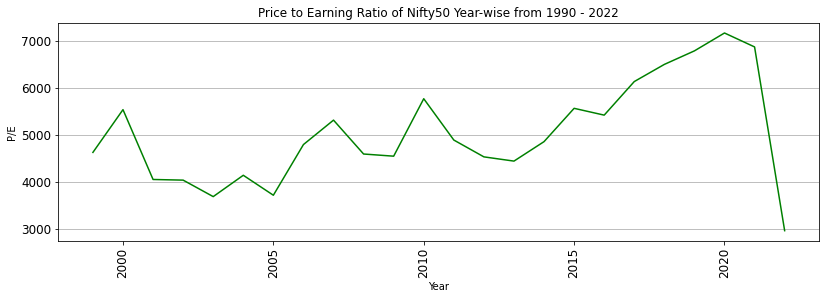

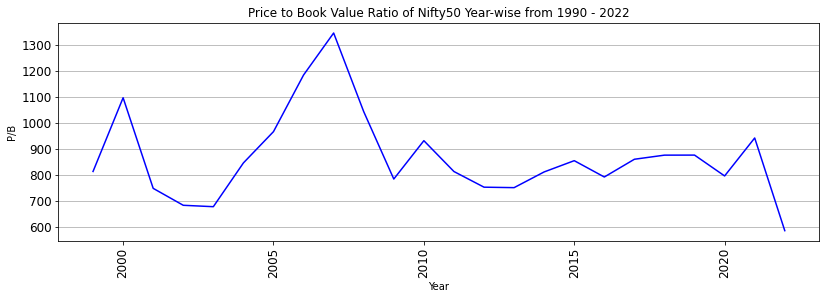

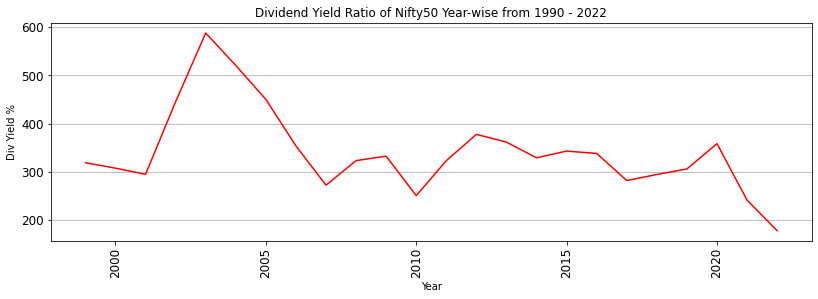

In [38]:
# Visualzing Price to Earning Ratio of Nifty50 grouped year-wise
check = Data2.groupby('Year')['P/E'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "P/E", legend = False, fontsize = 12, sharex = False, title = "Price to Earning Ratio of Nifty50 Year-wise from 1990 - 2022", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("P/E")
ax1.yaxis.grid(True)

# Visualzing Price to Book Value of Nifty50 grouped year-wise
check = Data2.groupby('Year')['P/B'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "P/B", legend = False, fontsize = 12, sharex = False, title = "Price to Book Value Ratio of Nifty50 Year-wise from 1990 - 2022", rot = 90, color = "blue")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("P/B")
ax1.yaxis.grid(True)

# Visualzing Dividend Yield of Nifty50 grouped year-wise
check = Data2.groupby('Year')['Div Yield %'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Div Yield %", legend = False, fontsize = 12, sharex = False, title = "Dividend Yield Ratio of Nifty50 Year-wise from 1990 - 2022", rot = 90, color = "red")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Div Yield %")
ax1.yaxis.grid(True)

In [39]:
Data2.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Year', 'Month',
       'WeekDay', 'P/E', 'P/B', 'Div Yield %'],
      dtype='object')

In [40]:
column_list = ['Open', 'High', 'Low', 'Close', 'Year', 'Month', 'WeekDay','P/E', 'P/B', 'Div Yield %']

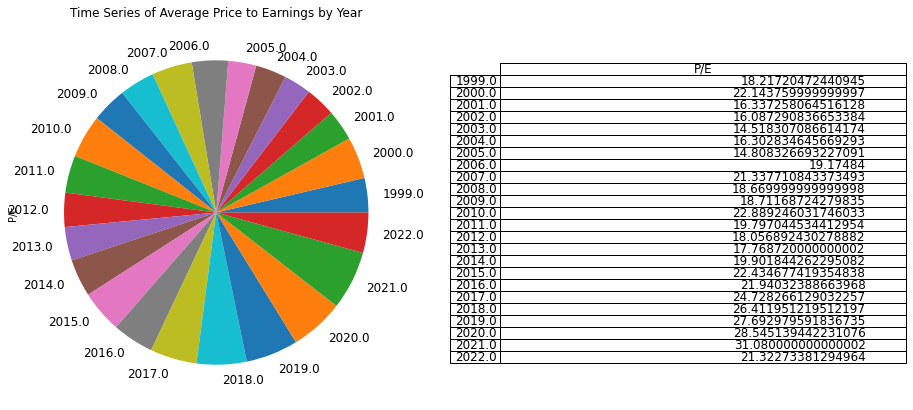

In [41]:
# Analyse based on Year how much Price to Earnings is generated.
for i, col_list in enumerate(column_list[0:8]):
    var = Data2.groupby('Year')[col_list].mean()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "P/E", legend = False, fontsize = 12, sharex = False, title = "Time Series of Average Price to Earnings by Year", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

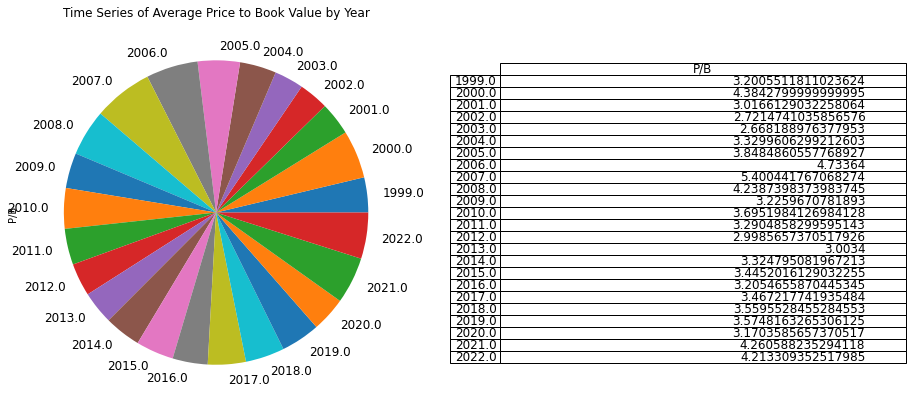

In [42]:
# Analyse based on Year how much Price to Earnings is generated.
for i, col_list in enumerate(column_list[0:9]):
    var = Data2.groupby('Year')[col_list].mean()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "P/B", legend = False, fontsize = 12, sharex = False, title = "Time Series of Average Price to Book Value by Year", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

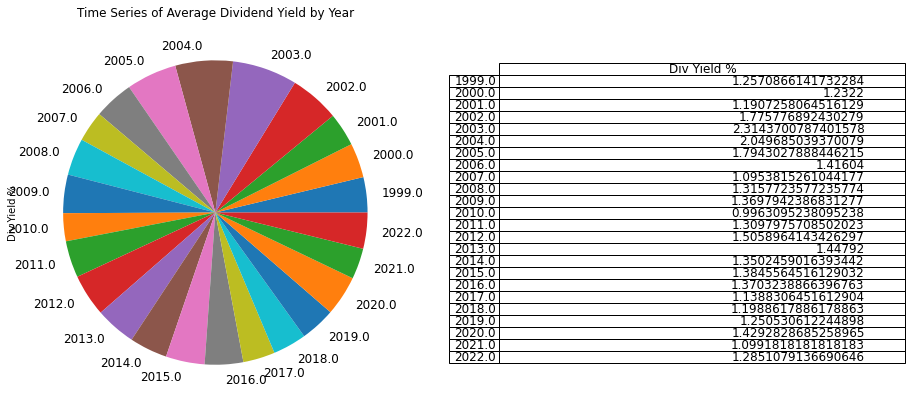

In [43]:
# Analyse based on Year how much Average Dividend Yield is generated.
for i, col_list in enumerate(column_list):
    var = Data2.groupby('Year')[col_list].mean()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Div Yield %", legend = False, fontsize = 12, sharex = False, title = "Time Series of Average Dividend Yield by Year", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

# Insights

Year Information: 1990 - 2022

Month Information: All 12 months (January, February, March, April, May, June, July, August, September, October, November, and December)

Day Information: Only 5 working days (Monday, Tuesday, Wednesday, Thursday and Friday)

    It is found that the Nifty50 spiked from 4500 to around 5000 from 2005 to 2010 (Opening, High, Low, Closing) - Reasons may be change in policies, change in market, change in production, change in investors, etc., Hence, in the dataset does not provide additional reasons to analyze the cause of spike/dip
    
    The histogram distribution shows that the data is skewed to the left (Indication of values range between 0 - 20000)
    It is very evident that Open, Close, High, Low, Adj Close stock values are highly collinear and hence have a very strong relationship
    As a general rule, any variable that shows (+/-) 0.5 strength is considered to have a significant impact on the target
    The whisker plot indicates the presence of outliers (This could lead to false insights and recommendation). Hence, the outliers are removed based on standard techniques (Z-Score in this case)
    As Observed the Price to Earnings is mostly earned in 2020
    As Observed the Price to Book Value is mostly earned in 2007
    As Observed the Dividend Yield is mostly earned in 2003


This analysis can further be extended to test the stationarity and implement time series forecasting methods to predict the stock market trades for both short-term and long-term horizons.
